In [14]:
from ipywidgets import interact

In [19]:
def g(x=True, y=1.0):
    return (x, y)

In [21]:
interact(g)




interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

<function __main__.g(x=True, y=1.0)>

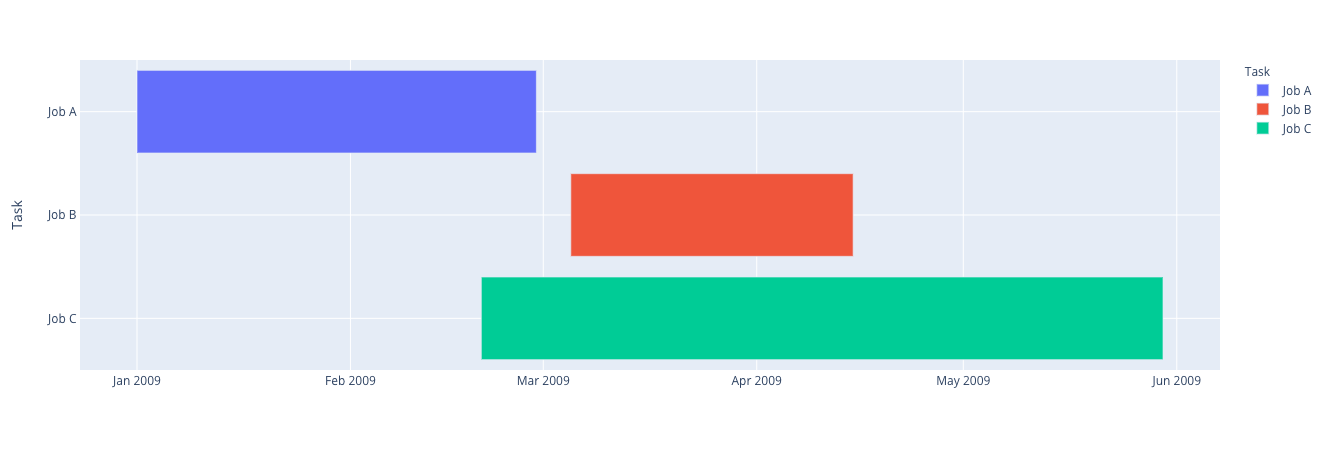

In [13]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame([dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
      dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
      dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')])

px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Task").show()

In [10]:
pd.to_datetime(["a"])

ValueError: Given date string not likely a datetime.

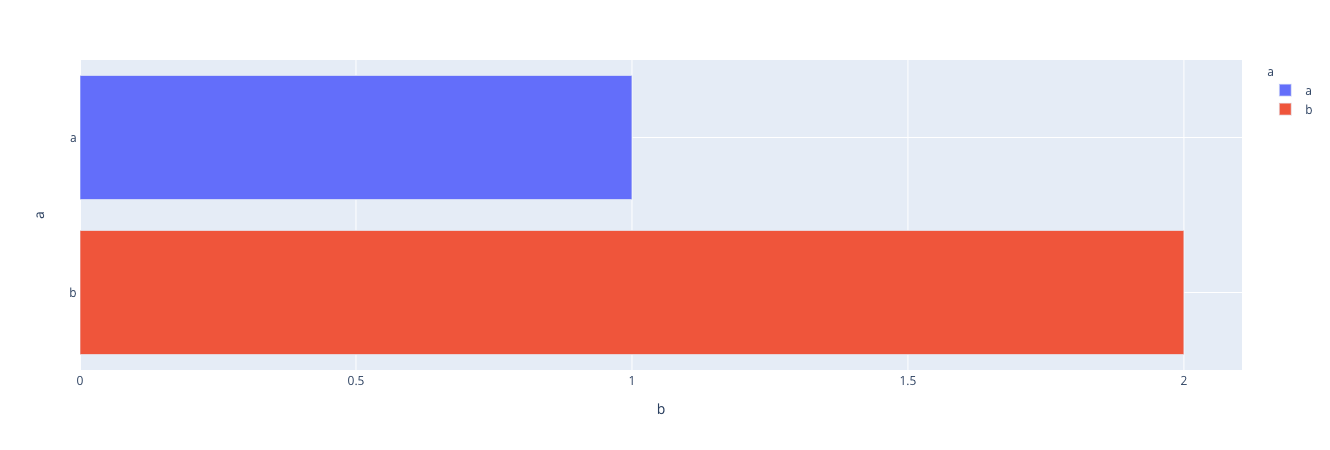

In [9]:
px.bar(
    dict(a=["a","b"], b=[1,2]),
    y="a", x="b", orientation="h", color="a"
)

   profit  loss product smoker  day    time  size
0   16.99  1.01  Female     No  Sun  Dinner     2
1   10.34  1.66    Male     No  Sun  Dinner     3
2   21.01  3.50    Male     No  Sun  Dinner     3
3   23.68  3.31    Male     No  Sun  Dinner     2
4   24.59  3.61  Female     No  Sun  Dinner     4


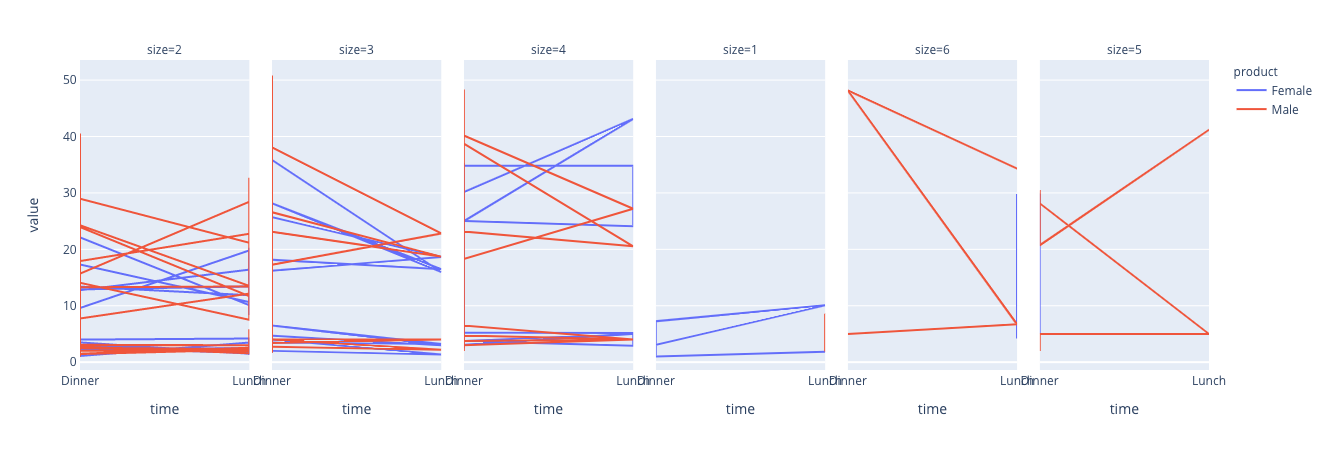

In [24]:
import plotly.express as px

df = px.data.tips()
df = df.rename(columns=dict(total_bill="profit", tip="loss", sex="product"))
print(df.head())

fig = px.line(df, x='time', y=['profit', 'loss'], color='product', facet_col='size')
fig.show()

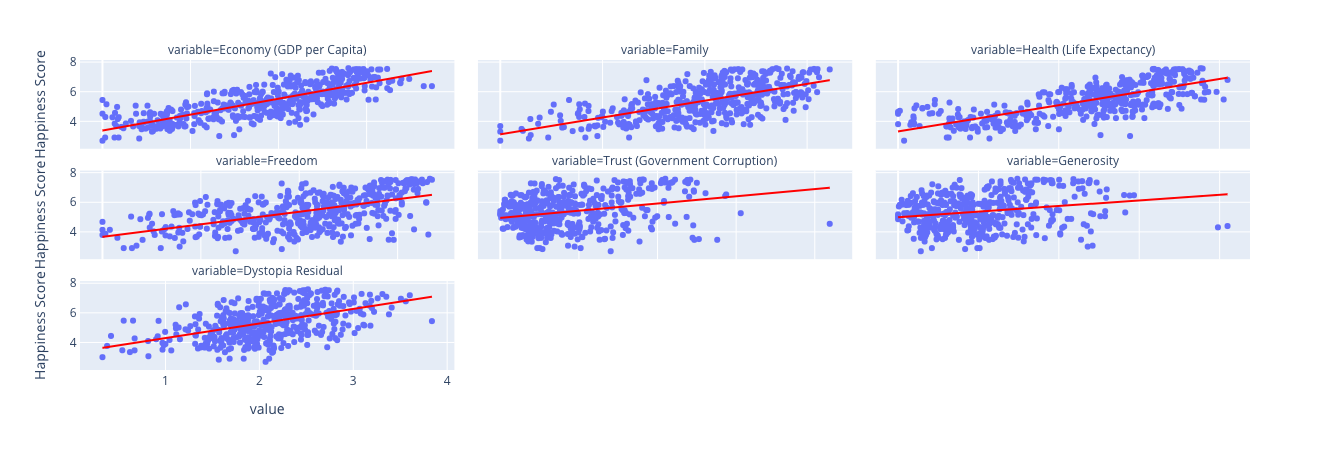

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/nicolas/Downloads/World_Happiness_2015_2017_.csv')
px.scatter(df, x=df.select_dtypes(np.float64).columns, y='Happiness Score', trendline='ols',
           color=px.NO_COLOR, trendline_color_override="red", render_mode="svg",
          facet_col="variable", facet_col_wrap=3).update_xaxes(matches=None)

In [19]:
import json
from urllib.request import urlopen

orders = json.load(open("orderings.json", "r"))

schema = json.load(urlopen("https://raw.githubusercontent.com/plotly/plotly.js/master/dist/plot-schema.json"))

In [20]:
del schema["traces"]["area"]
del schema["traces"]["scatter"]["attributes"]["r"]
del schema["traces"]["scatter"]["attributes"]["t"]
del schema["traces"]["bar"]["attributes"]["r"]
del schema["traces"]["bar"]["attributes"]["t"]
del schema["layout"]["layoutAttributes"]["radialaxis"]
del schema["layout"]["layoutAttributes"]["angularaxis"]
del schema["layout"]["layoutAttributes"]["direction"]
del schema["layout"]["layoutAttributes"]["orientation"]

def reorder_keys(parent, target, order):
    original = parent[target]
    parent[target] = {}
    for k in order:
        if k in original:
            parent[target][k] = original[k]
    for k in original.keys():
        if k not in parent[target]:
            parent[target][k] = original[k]
            print("missing key in %s: %s" % (target, k))

reorder_keys(schema, "traces", orders["traces"])
reorder_keys(schema["layout"], "layoutAttributes", orders["layout"])

for trace in schema["traces"].values():
    reorder_keys(trace, "attributes", orders["trace_attr_order"])
    
import re

def recurse(node):
    try:
        for key, value in node.items():
            if key == "description":
                node[key] = value.replace("*","`")
            else:recurse(value)
    except:
        if key == "description":
            node[key] = value.replace("*","`")

recurse(schema)

json.dump(schema, open('plotschema.json', 'w'), indent=2)